# Perceptron (感知機)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm (花萼長度)
2. sepalWidth: sepal width in cm (花萼寬度)
3. petalLength: petal length in cm (花瓣長度)
4. petalWidth: petal width in cm (花瓣寬度)

![](iris.png)

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

![iris2.png](iris2.png)

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Explore the dataset

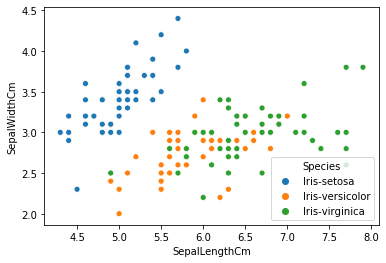

In [3]:
sns.scatterplot( x = df.SepalLengthCm, y = df.SepalWidthCm, hue = df.Species)

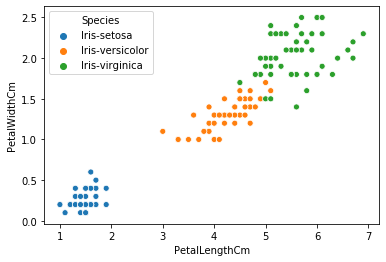

In [4]:
sns.scatterplot( x = df.PetalLengthCm, y = df.PetalWidthCm, hue = df.Species)

## Data preprocessing

In this project, we ue Perceptron to implement a **binary classification**.  
The algorithm can split the dataset into two classes: (1) Setosa and (2) not Setoas.

在這個專案中，我們使用 Perceptron 來完成一個 **二元分類器**。  
這是說，本專案的分類器可以將資料集分成兩類，(1) Setosa 以及 (2) 不是 Setosa

In [24]:
# the column 'isSetosa' indicates that whether the item belongs to Setosa or not.
df['isSetosa']=np.where(df.Species=='Iris-setosa', 1, 0)
df.isSetosa.value_counts()

0    100
1     50
Name: isSetosa, dtype: int64

In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'isSetosa'],
      dtype='object')

We use attributes ``PetalLengthCm (花瓣長度)`` and ``PetalWidthCm (花瓣寬度)`` to classify the dataset.  

我們使用花瓣長度，以及花瓣寬度做為準則，來分割資料集。

In [7]:
x = df[['PetalLengthCm', 'PetalWidthCm']]
y = df[['isSetosa']]

## Split the dataset

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [35]:
from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(x_train, y_train)

C:\Users\justi\anaconda3\envs\MLCourse\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

上述的程式碼中你會遇到 DataConversionWarning 這個「警告」訊息。  
實際上你的程式還是可以 run 的。

這個警告是說，你傳入的 y_train 是個 2 維陣列，但 fit 要求的是 1 維的陣列 (y was passed when a 1d array was expected)。  

如果想讓這個 warning 消失掉，解決方式是就把 y_train 轉成 1 維即可。  
有兩種方式可以辦到。

1. y_train.values.ravel()
2. y_train.to_numpy().ravel()

In [46]:
print(f'The shape of y_train is {y_train.shape}')
y_train1 = y_train.values.ravel()
print(f'The shape of y_train1 is {y_train1.shape}')


The shape of y_train is (100, 1)
The shape of y_train1 is (100,)


## Evaluate the performance of the model

In [30]:
from sklearn.metrics import accuracy_score
y_pred = p.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



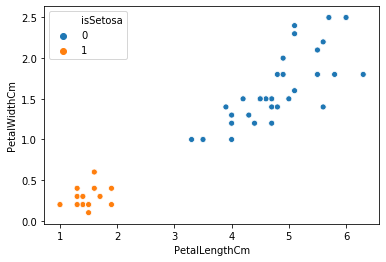

In [31]:
x_tmp = x_test.copy()
#The following code construct a new column 'isSetosa' in x_tmp
#isSetosa indicates whether the item is setosa or not
#底下的程式碼在 x_tmp 中新增一個欄位，名為 'isSetosa'. 
#這個欄位表示了這筆資料是否為 setosa
x_tmp['isSetosa'] = p.predict(x_test)
sns.scatterplot(x=x_tmp.PetalLengthCm, y = x_tmp.PetalWidthCm, hue=x_tmp.isSetosa)  

## Draw the decsion boundary

底下的程式碼中
p.coef[0][0] 為 $w_1$. 

p.coef[0][1] 為 $w_2$. 

而 p.intercept_ 則為 $b$ (bias--偏誤)

透過 $w_1$, $w_2$ 以及 $b$ 我們可以決定一條直線，其分割 2 維平面，將資料點分割成兩個部分。

這條直線可以透過底下的方式得到：

$x_1 w_1$ + $x_2 w_2$ + $b = 0$

$x_1 w_1 + x_2 w_2 = -b$

底下令 $x_1$ 為 $x$, $x_2$ 為 $y$, 上述的方程式可以改寫為

$w_1 x + w_2 y = -b \rightarrow$

$w_2 y = -b - w_1 x \rightarrow$ 

$y = - \frac{w_1}{w_2} x - \frac{b}{w_2}$


In [11]:
print(p.coef_)
print(p.intercept_)

[[-0.7 -1. ]]
[2.]


In [12]:
xpoints = np.array([0,3])
xpoints

array([0, 3])

In [13]:
b = p.intercept_
w1 = p.coef_[0][0]
w2 = p.coef_[0][1]

ypoints = (-w1/w2)* xpoints + (-b / w2)
ypoints

array([ 2. , -0.1])

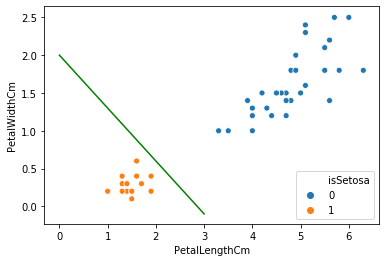

In [47]:
sns.scatterplot(x=x_tmp.PetalLengthCm, y = x_tmp.PetalWidthCm, hue=x_tmp.isSetosa)
#Draw the decision boundary
plt.plot(xpoints,ypoints, color='green')